# Analisis Data Pendanaan Startup

Nama: Amir Zuhdi Wibowo<br/>
NIM: 223307033<br/>
Kelas: TI-5B<br/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Membaca data
sample_file_path = "startup_data.csv"
df = pd.read_csv(sample_file_path, on_bad_lines='skip')

In [3]:
# Kolom pendanaan
funding_columns = [
    "No_Stage_Amount", "Seed_Amount", "Series_A_Amount", 
    "Series_B_Amount", "Series_C_Amount", "Series_D_Amount"
]

# Membersihkan simbol $ dan , dari kolom pendanaan
for col in funding_columns:
    df[col] = df[col].str.replace(r"[\$,]", "", regex=True)

# Mengonversi kolom pendanaan menjadi numerik
df[funding_columns] = df[funding_columns].apply(pd.to_numeric, errors='coerce')

In [4]:
# Menangani nilai kosong
string_columns = [
    "Description", "Stage", "Market", "Names", 
    "No_Stage_Date", "Pitch", "Seed_Date", 
    "Series_A_Date", "Series_B_Date", "Series_C_Date", "Series_D_Date"
]

numeric_columns = [
    "No_Stage_Amount", "Seed_Amount", "Series_A_Amount", 
    "Series_B_Amount", "Series_C_Amount", "Series_D_Amount"
]

# Isi nilai kosong pada kolom string dengan 'Unknown'
for col in string_columns:
    df[col] = df[col].fillna("Unknown")

# Isi nilai kosong pada kolom numerik dengan 0
for col in numeric_columns:
    df[col] = df[col].fillna(0)

# Gantikan value dari Stage yang awalnya "-" menjadi "Not Passed"
df["Stage"] = df["Stage"].replace("-", "Not Passed")

In [5]:
# Menghitung total pendanaan
df["Total Funding"] = df[funding_columns].fillna(0).sum(axis=1)

# Tampilkan data
print(df)

                                            Description  \
0                                               Unknown   
1                                               Unknown   
2     Visualead (视觉码) creates better interactions be...   
3                                               Unknown   
4                                               Unknown   
...                                                 ...   
3202                                            Unknown   
3203  Talari WAN solutions bring Internet economics ...   
3204                                            Unknown   
3205                                            Unknown   
3206                                            Unknown   

                           Market             Names  No_Stage_Amount  \
0                           Cable     Epic-Sciences              0.0   
1                    All Students  Apreso-Classroom              0.0   
2     Bridging Online and Offline         Visualead              0.0   
3  

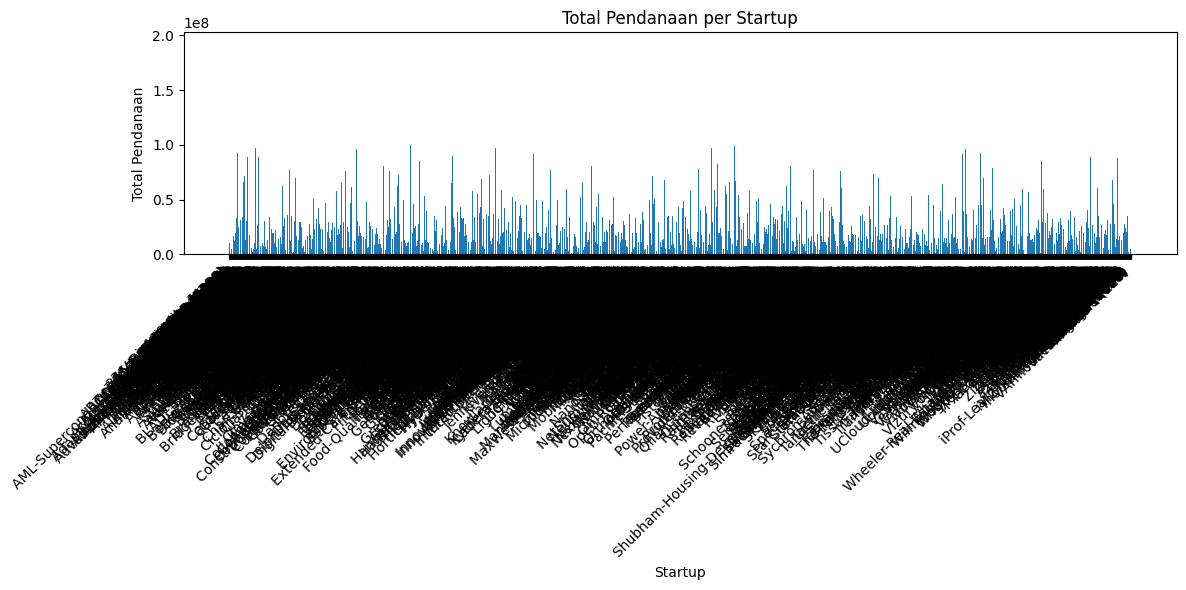

In [6]:
# Total Pendanaan per Startup
df["Unique_Description"] = df["Names"] + " (" + df.index.astype(str) + ")"

# Kelompokkan berdasarkan 'Unique_Description'
chart_data = df.groupby("Unique_Description")["Total Funding"].sum().reset_index()

# Buat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(chart_data["Unique_Description"], chart_data["Total Funding"])
plt.title("Total Pendanaan per Startup")
plt.xlabel("Startup")
plt.ylabel("Total Pendanaan")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

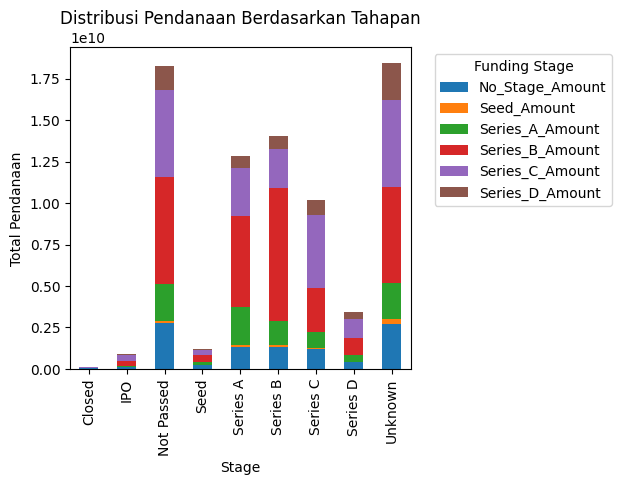

In [7]:
# Distribusi Pendanaan Berdasarkan Tahapan
stage_funding = df.groupby("Stage")[funding_columns].sum().reset_index()

# Buat grafik batang untuk distribusi pendanaan
plt.figure(figsize=(12, 6))
stage_funding.plot(x="Stage", y=funding_columns, kind='bar', stacked=True)
plt.title("Distribusi Pendanaan Berdasarkan Tahapan")
plt.xlabel("Stage")
plt.ylabel("Total Pendanaan")
plt.legend(title="Funding Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
# Fungsi untuk memfilter berdasarkan stage
def filter_by_stage(stage):
    filtered_data = df[df["Stage"] == stage]
    if filtered_data.empty:
        print(f"Tidak ada startup pada Stage: {stage}")
    else:
        print(f"Startup pada Stage: {stage}")
        print(filtered_data)

# Contoh: Filter untuk stage 'Seed'
filter_by_stage('Seed')

Startup pada Stage: Seed
                                            Description  \
79                                              Unknown   
98    SaaS solution to measure, manage, and automate...   
126   A global start-up, Balluun has headquarters in...   
207                                             Unknown   
217                                             Unknown   
276                                             Unknown   
309   Zend is the leading provider of software and s...   
369                                             Unknown   
372                                             Unknown   
439                                             Unknown   
604                                             Unknown   
622                                             Unknown   
653                                             Unknown   
705   EcoMotors develops unique, fuel efficient, cle...   
708   Simple. Safe. Fun. Anonymous chat. http://AppS...   
758   Established in early 2012

In [ ]:
# Menyimpan Model
import pickle

filename = 'startup.sav'
pickle.dump(reg,open(filename,'wb'))